In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from statsmodels.api import qqplot
from statsmodels.formula.api import ols  #linear regression
from statsmodels.formula.api import logit   #logistic regression
from statsmodels.graphics.mosaicplot import mosaic # plot confusion matrix

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import ElasticNet
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from pathlib import Path

from sklearn.metrics import mean_squared_error

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline



In [2]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\group work\spotify_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [4]:
df.describe(include='all')

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1159749,1159763,1159764,1.159764e+06,1.159764e+06,1159764,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
unique,NaN,64158,882360,1159764,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Traditional,Intro,53QF56cjZA9RTuuMZDrSA6,NaN,NaN,black-metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4058,466,1,NaN,NaN,21852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.590613e+05,NaN,NaN,NaN,1.838312e+01,2.011955e+03,NaN,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,NaN,NaN,NaN,1.588554e+01,6.803901e+00,NaN,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00,2.000000e+03,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,NaN,NaN,NaN,5.000000e+00,2.006000e+03,NaN,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,NaN,NaN,NaN,1.500000e+01,2.012000e+03,NaN,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,NaN,NaN,NaN,2.900000e+01,2.018000e+03,NaN,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00


In [5]:
df['mode'].astype(str).astype('category')

0          1
1          1
2          1
3          1
4          0
          ..
1159759    0
1159760    0
1159761    1
1159762    1
1159763    0
Name: mode, Length: 1159764, dtype: category
Categories (2, object): ['0', '1']

In [6]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


Step 1: Data Clearning

In [7]:
# drop unnecessary columns
df.drop(['Unnamed: 0','track_id'], axis=1, inplace=True)

In [8]:
# the year is from 2000 to 2023, we only keep the latest 5 years 

df = df[df['year'] >= 2019]


In [9]:
# create two new columns and drop the old one
df['minutes'] = pd.to_timedelta(df['duration_ms'],unit="ms").dt.components.minutes
df['seconds'] = pd.to_timedelta(df['duration_ms'],unit="ms").dt.seconds
df.drop('duration_ms', axis=1, inplace=True)

In [10]:
#  totaly 158391 observations with the 'popularity' == 0, we drop them, since these observations does not contribute to the models.

df[df['popularity'] == 0]
df = df[df['popularity'] != 0]


<Axes: >

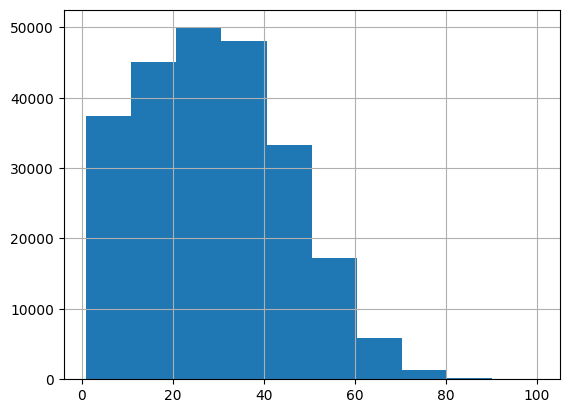

In [11]:
df['popularity'].hist()

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'minutes'}>,
        <Axes: title={'center': 'seconds'}>]], dtype=object)

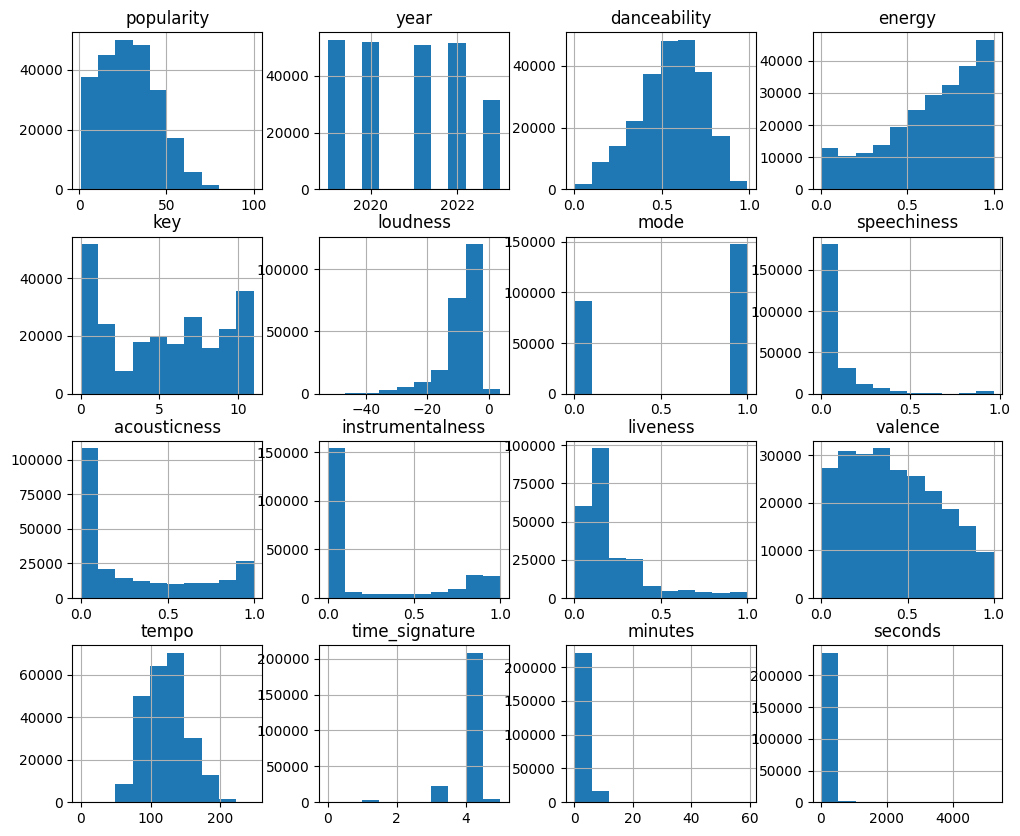

In [12]:
# check the data distribution
df.hist(figsize=(12, 10))

Creating columns list with all numeric values

In [13]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'minutes', 'seconds'],
      dtype='object')

In [14]:
cols=['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'minutes', 'seconds']

In [15]:
correlation = df[cols].corr()

In [16]:
corr_p =correlation.corr()['popularity'].sort_values(ascending=False)
corr_p

popularity          1.000000
danceability        0.343616
valence             0.157707
loudness            0.129661
time_signature      0.067793
year                0.006879
tempo              -0.010501
key                -0.011465
energy             -0.019010
acousticness       -0.059627
mode               -0.086165
speechiness        -0.137876
liveness           -0.264368
instrumentalness   -0.293255
seconds            -0.384677
minutes            -0.389219
Name: popularity, dtype: float64

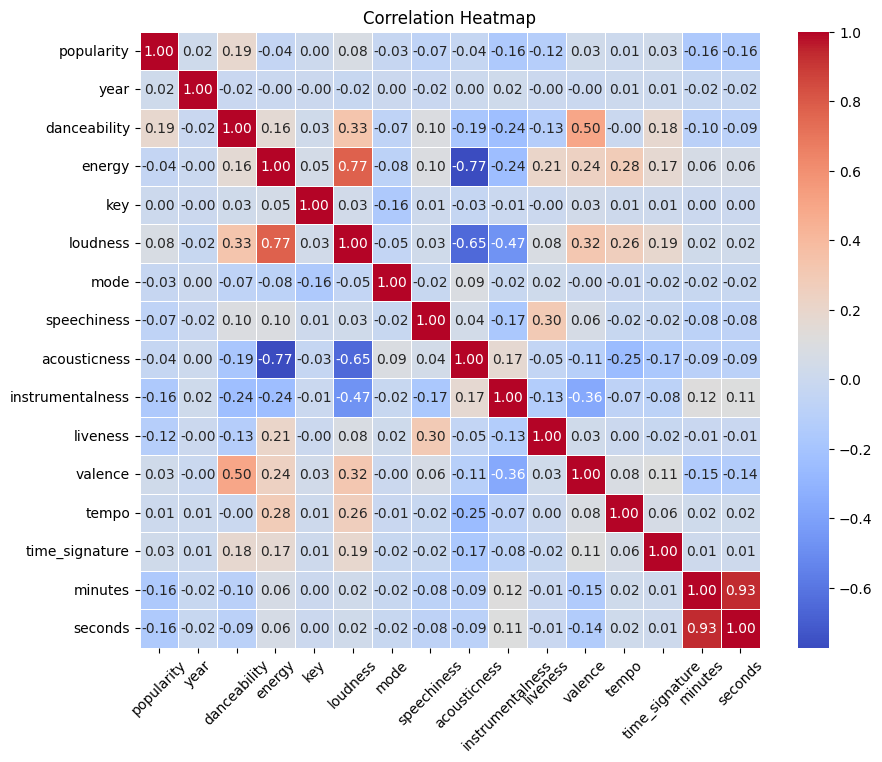

In [17]:
# plotting correlation heatmap

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

In [18]:
# identify highly correlated pairs

corr_pairs = correlation.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)


negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 energy    loudness    0.774768
loudness  energy      0.774768
minutes   seconds     0.932722
seconds   minutes     0.932722
dtype: float64

Less Correlated Pairs: 
 energy        acousticness   -0.772307
loudness      acousticness   -0.650540
acousticness  energy         -0.772307
              loudness       -0.650540
dtype: float64


STEP2: EDA

Statistic and data distribution

In [19]:
df['mode'] = df['mode'].astype(str).astype('category')


In [20]:
df.describe(include='all')

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minutes,seconds
count,238488,238493,238493.000000,238493.000000,238493,238493.000000,238493.000000,238493.000000,238493.000000,238493,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000
unique,30279,196510,NaN,NaN,82,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Elvis Presley,Home,NaN,NaN,chill,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,627,87,NaN,NaN,4508,NaN,NaN,NaN,NaN,147534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.657604,2020.822179,NaN,0.550345,0.638305,5.276406,-8.940098,NaN,0.097213,0.316682,0.254031,0.216042,0.424539,121.896291,3.892387,3.227629,223.316236
std,NaN,NaN,16.391038,1.347267,NaN,0.182319,0.270961,3.569364,6.090294,NaN,0.132218,0.349895,0.369639,0.192043,0.259775,30.078176,0.460211,1.790623,112.807799
min,NaN,NaN,1.000000,2019.000000,NaN,0.000000,0.000000,0.000000,-52.351000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,NaN,NaN,16.000000,2020.000000,NaN,0.433000,0.462000,2.000000,-10.461000,NaN,0.038000,0.008340,0.000000,0.099700,0.204000,99.278000,4.000000,2.000000,167.000000
50%,NaN,NaN,28.000000,2021.000000,NaN,0.566000,0.694000,5.000000,-7.256000,NaN,0.051800,0.148000,0.001310,0.130000,0.397000,122.179000,4.000000,3.000000,205.000000
75%,NaN,NaN,40.000000,2022.000000,NaN,0.687000,0.868000,8.000000,-5.181000,NaN,0.092900,0.616000,0.629000,0.279000,0.627000,140.044000,4.000000,4.000000,255.000000


In [21]:
mean = df[['popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness','valence','tempo','time_signature','minutes','seconds']].mean()
mean_df = pd.DataFrame(mean).reset_index()
mean_df.columns =['Features','Average']
mean_df.to_csv('mean.csv',index=False)

In [22]:
print(mean_df)

            Features     Average
0         popularity   28.657604
1       danceability    0.550345
2             energy    0.638305
3                key    5.276406
4           loudness   -8.940098
5        speechiness    0.097213
6       acousticness    0.316682
7   instrumentalness    0.254031
8           liveness    0.216042
9            valence    0.424539
10             tempo  121.896291
11    time_signature    3.892387
12           minutes    3.227629
13           seconds  223.316236


The mean of popularity is 28.65.
The most popular genre is chill.
The mean of danceability if 0.55
The mean of energy is 0.64.
The mean of key is 5.27.
The mean of loudness is -8.94.
The majority of the mode is 1.
The mean of speechiness is 0.097.
The mean of acousticness is 0.32.
The mean of instrumentalness is 0.25.
The mean of liveness is 0.22.
The mean of tempo is 121.89.
The mean of time_signature is 3.89.
The mean of minutes is 3.23 minutes. 
The mean of seconds is 223 seconds.


Popularity by year

Text(0.5, 1.0, 'Popularity by Year')

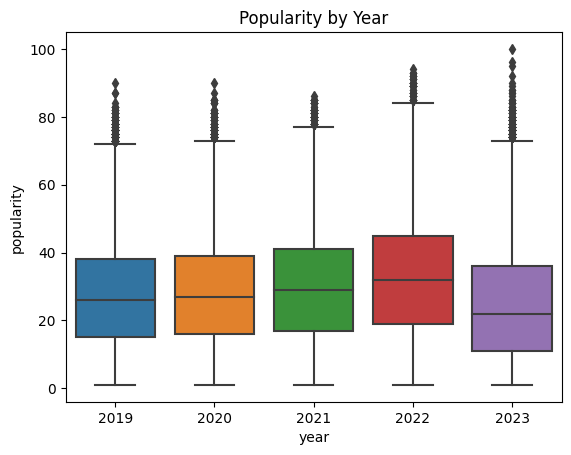

In [23]:
sns.boxplot(x='year', y='popularity', data=df)
plt.title('Popularity by Year')

Genre Analysis

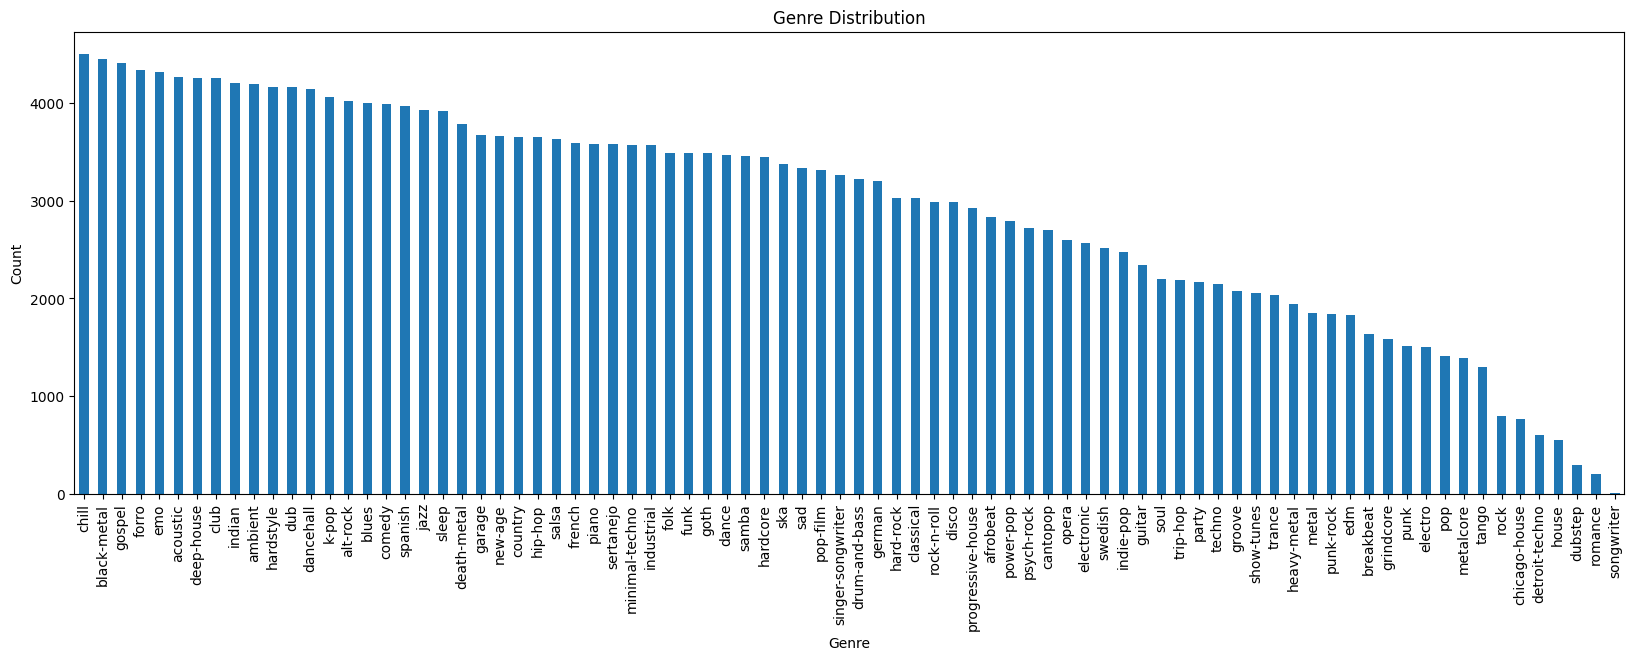

In [24]:
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(20, 6))
ax = genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.tight_layout
plt.show()



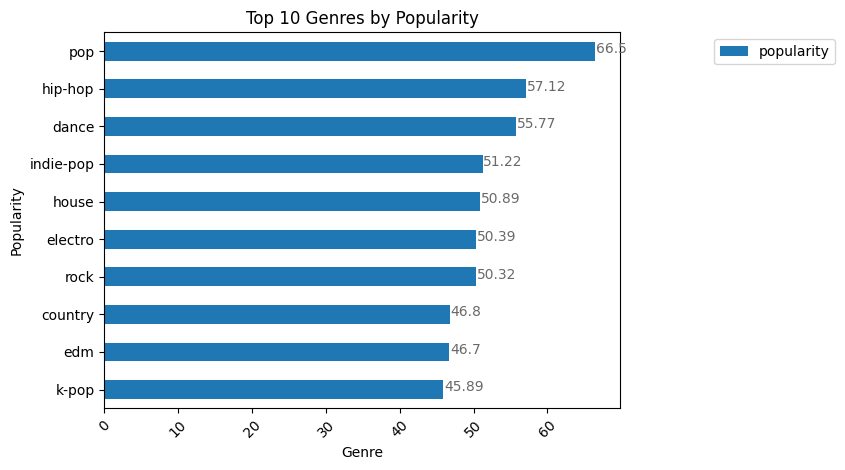

In [25]:
top_10_genres = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).reset_index().head(10)

top_10_genres = top_10_genres.sort_values(by='popularity', ascending=True)

ax = top_10_genres.plot(kind='barh', x='genre', y= 'popularity')
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.title("Top 10 Genres by Popularity")
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the top of the bars
for i in ax.patches:
    plt.text(i.get_width()+.1, i.get_y()+.2, 
             str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

    
plt.legend(loc='upper center', bbox_to_anchor=(1.3,1))
plt.show()


In [26]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'minutes', 'seconds'],
      dtype='object')

top 10 artists by popularity

<Figure size 1200x600 with 0 Axes>

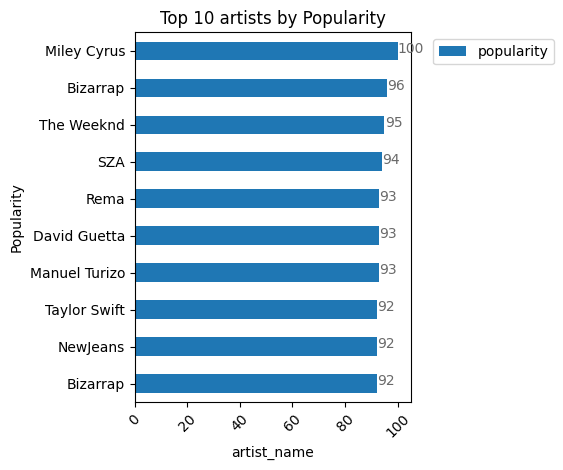

In [27]:

top_10_artists = df[['artist_name', 'popularity']].sort_values(by ='popularity', ascending=False).head(10)
top_10_artists = top_10_artists.sort_values(by='popularity', ascending=True)

 # Adjust width and height for better aspect ratio
plt.figure(figsize=(12,6))

# plot 
ax = top_10_artists.plot(kind='barh', x='artist_name', y= 'popularity')
plt.legend(loc='upper center', bbox_to_anchor=(1.3,1))
plt.xlabel("artist_name")
plt.ylabel("Popularity")
plt.title("Top 10 artists by Popularity")
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the top of the bars
for i in ax.patches:
    plt.text(i.get_width()+.1, i.get_y()+.2, 
             str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

    
plt.legend(loc='upper center', bbox_to_anchor=(1.3,1))
plt.show()

Top 10 songs by popularity

<Figure size 1500x500 with 0 Axes>

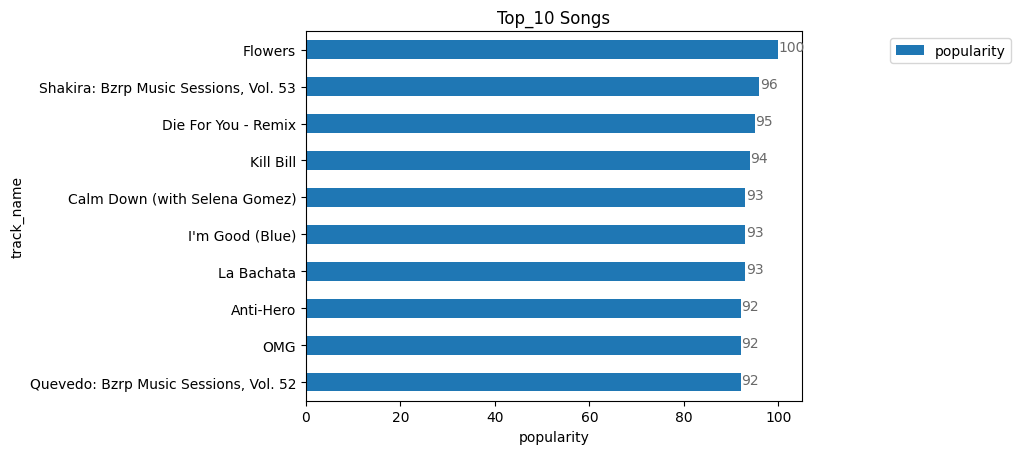

In [28]:
top_10_artists = df[['track_name', 'popularity']].sort_values(by ='popularity', ascending=False).head(10)
top_10_artists = top_10_artists.sort_values(by='popularity', ascending=True)
plt.figure(figsize=(15, 5))
ax = top_10_artists.plot(kind='barh', x='track_name', y= 'popularity')
plt.legend(loc='upper center', bbox_to_anchor=(1.3,1))
plt.title('Top_10 Songs')
plt.xlabel('popularity')

# add value labels to each bar
for i in ax.patches:
    plt.text(i.get_width()+.1, i.get_y()+.2, 
             str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')



Dancebility vs Population

In [29]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'minutes', 'seconds'],
      dtype='object')

Text(0.5, 1.0, 'danceability vs popularity')

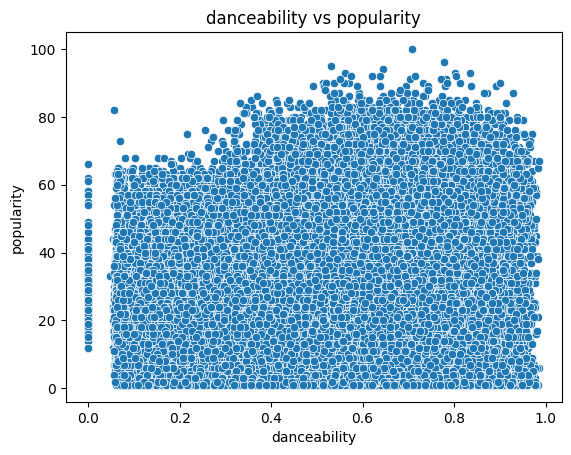

In [30]:
sns.scatterplot(x='danceability', y ='popularity', data = df)
plt.title('danceability vs popularity')

Duration vs popularity

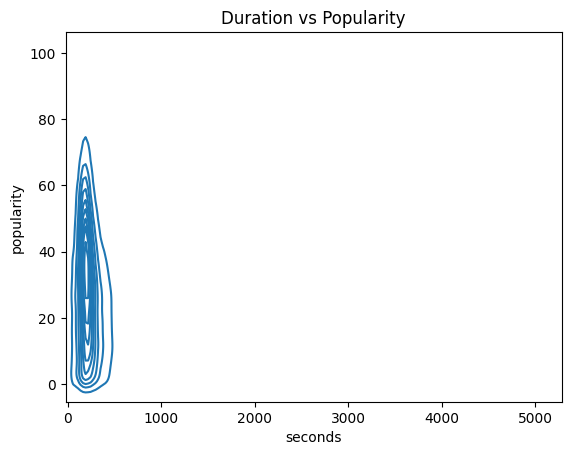

In [31]:
sns.kdeplot(data=df, x='seconds', y='popularity')
plt.title('Duration vs Popularity')
plt.show()

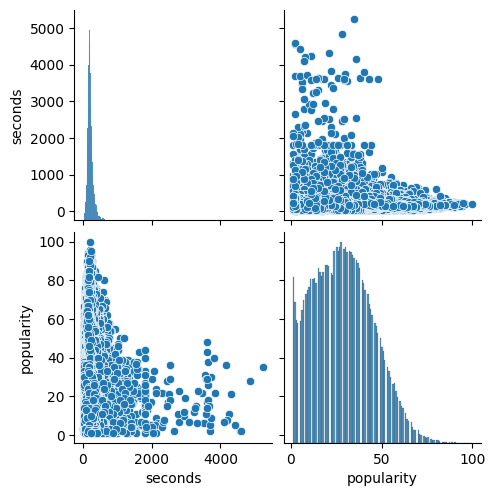

In [32]:
sns.pairplot(data=df, vars=['seconds', 'popularity'])
plt.show()


Correlation Analysis

Build models to predict

In [33]:
model_ols = ols('popularity ~  year + danceability + loudness + minutes + +seconds + instrumentalness', data = df)
result_model_ols = model_ols.fit()
print(result_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2862.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:04:25   Log-Likelihood:            -9.9712e+05
No. Observations:              238493   AIC:                         1.994e+06
Df Residuals:                  238486   BIC:                         1.994e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -503.7182     48.657  

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
X = df.drop(['popularity'], axis=1)  # Features (all columns except 'popularity')
y = df['popularity']  # Target variable


In [47]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'minutes', 'seconds'],
      dtype='object')

In [69]:
# separate features and target
categorical_features = ['genre', 'artist_name','track_name','mode', 'year','key']
numerical_features = ['danceability','energy', 'loudness','speechiness','acousticness','instrumentalness', 'liveness','valence', 'tempo','time_signature','minutes','seconds' ]
target = 'popularity'

In [70]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [71]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [72]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [73]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'artist_name',
                                                   'track_name', 'mode', 'year',
                                                   'key']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'time_signature',
                                                   'minutes', 'seconds'])])),
                ('regressor', LinearRegression())])

In [77]:
# performance 
pred_ln = linear_regression.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred_ln, y_test))
MSE_LR = np.sqrt(mean_squared_error(pred_ln, y_test))
print('MSE_LR', MSE_LR)
r2_score_ln = r2_score(y_test, pred_ln)
print("R2 Score: ", r2_score_ln)

MSE_LR 10.847715242974846
R2 Score:  0.5614476553313615


LASSO MODLE AND PERFORMANCE

In [78]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'artist_name',
                                                   'track_name', 'mode', 'year',
                                                   'key']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'time_signature',
                                                   'minutes', 'seconds'])])),
                ('regressor', Lasso())])

In [81]:
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))
MSE_LS = np.sqrt(mean_squared_error(lasso_pred, y_test))
print(MSE_LS)
r2_score_la = r2_score(y_test, lasso_pred)
print("R2 Score: ", r2_score_la)

15.78794519819665
R2 Score:  0.0710419442350474


ELASTIC MODEL AND PERFORMANCE

In [44]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio = 0.8))
])

elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year',
                                                   'key']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'time_signature',
                                                   'minutes', 'seconds'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [45]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))
MSE_EL = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print(MSE_EL)
r2_score_el = r2_score(y_test, elasticnet_pred)
print("R2 Score: ", r2_score_el)

15.768927947164887
R2 Score:  0.07327853531276407


SUMMARIZE AND COMPARE THE MODELS' PERFORMANC

In [46]:
print({'MSE_OSL': MSE_OSL, 'MSE_LR':MSE_LR, 'MSE_RG': MSE_RG,  'MSE_LS': MSE_LS,'MSE_EL': MSE_LR})
print({'R2_OLS': R2_OLS, 'r2_score_ln': r2_score_ln, 'r2_score_rg': r2_score_rg, 'r2_score_la' : r2_score_la, 'r2_score_el': r2_score_e})

NameError: name 'MSE_OSL' is not defined

USING LOGISTIC REGRESSION BUILDING MODEL TO PREDICT

In [64]:
df['popularity'].describe()

count    238493.000000
mean         28.657604
std          16.391038
min           1.000000
25%          16.000000
50%          28.000000
75%          40.000000
max         100.000000
Name: popularity, dtype: float64

We use 80 as the treshold to classify 'popularity. there are 240 observations of popularity is greater than 80. Our purpose is to analysis the factors to contribute the songs to be the most popular songs. therefore, business can use these infor information to develop new tracks. 

In [66]:
df[df['popularity'] > 80]['popularity'].count()

240

In [67]:
df[df['popularity'] <= 80]['popularity'].count()

238253

In [75]:
#Classify 'population as two category 
df['popularity_classify'] = ['high' if x >= 80 else 'low' for x in df['popularity']]


In [79]:
df.describe(include='all')

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minutes,seconds,popularity_classify
count,238488,238493,238493.000000,238493.000000,238493,238493.000000,238493.000000,238493.000000,238493.000000,238493,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493.000000,238493
unique,30279,196510,NaN,NaN,82,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Elvis Presley,Home,NaN,NaN,chill,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
freq,627,87,NaN,NaN,4508,NaN,NaN,NaN,NaN,147534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238170
mean,NaN,NaN,28.657604,2020.822179,NaN,0.550345,0.638305,5.276406,-8.940098,NaN,0.097213,0.316682,0.254031,0.216042,0.424539,121.896291,3.892387,3.227629,223.316236,NaN
std,NaN,NaN,16.391038,1.347267,NaN,0.182319,0.270961,3.569364,6.090294,NaN,0.132218,0.349895,0.369639,0.192043,0.259775,30.078176,0.460211,1.790623,112.807799,NaN
min,NaN,NaN,1.000000,2019.000000,NaN,0.000000,0.000000,0.000000,-52.351000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,NaN
25%,NaN,NaN,16.000000,2020.000000,NaN,0.433000,0.462000,2.000000,-10.461000,NaN,0.038000,0.008340,0.000000,0.099700,0.204000,99.278000,4.000000,2.000000,167.000000,NaN
50%,NaN,NaN,28.000000,2021.000000,NaN,0.566000,0.694000,5.000000,-7.256000,NaN,0.051800,0.148000,0.001310,0.130000,0.397000,122.179000,4.000000,3.000000,205.000000,NaN
75%,NaN,NaN,40.000000,2022.000000,NaN,0.687000,0.868000,8.000000,-5.181000,NaN,0.092900,0.616000,0.629000,0.279000,0.627000,140.044000,4.000000,4.000000,255.000000,NaN


In [ ]:
categorical_features = ['genre', 'artist_name','track_name','mode', 'year','key']
numerical_features = ['danceability','energy', 'loudness','speechiness','acousticness','instrumentalness', 'liveness','valence', 'tempo','time_signature','minutes','seconds' ]
target = 'popularity'

In [82]:
# build pipeline
# pipeline can do data clearning and variaable preparation
cat_transformer = OneHotEncoder(handle_unknown='ignore') # does not have model in it.
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [84]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features], df[target], test_size=0.2, random_state=42)

In [85]:
# transform dataset using pipeline
# scaling, feature engineering
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [90]:
x_train_transformed.shape

(190794, 188436)

In [91]:
x_test_transformed.shape

(47699, 60695)

In [89]:
# coding columns and features
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
all_feat = numerical_features + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

ValueError: Shape of passed values is (190794, 1), indices imply (190794, 60695)

In [ ]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
print(f1)score(y_pred,y_test)
print(accuracy_score(y_pred, y_test))

In [ ]:
# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Pass through non-categorical columns without transformation
)

In [ ]:
# Create and train the Random Forest Regression model using a pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#rf_model.fit(X_train, y_train)


In [ ]:

# Split the data into features (independent variables) and the target variable (popularity)
X = df.drop(['popularity'], axis=1)  # Features (all columns except 'popularity')
y = df['popularity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns that need different preprocessing steps (categorical and numerical features)
categorical_features = ['artist_name', 'track_name', 'genre','mode']
numerical_features = ['year', 'danceability', 'energy', 'key', 'loudness',
                      'mode', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create the data preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()  # Standardize numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

# Combine the preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
max_depth = 5
# Create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=max_depth)


# Create the pipeline, combining preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', dt_model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 187.00634834214827
R-squared (R2): 0.2583169346227231
